In [1]:
library(tidyverse)
library(Matrix)
library(patchwork)

Warning message:
‚Äúreplacing previous import ‚Äòvctrs::data_frame‚Äô by ‚Äòtibble::data_frame‚Äô when loading ‚Äòdplyr‚Äô‚Äù
‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 1.3.0 ‚îÄ‚îÄ

‚úî ggplot2 3.3.3     ‚úî purrr   0.3.4
‚úî tibble  3.1.0     ‚úî dplyr   1.0.1
‚úî tidyr   1.1.1     ‚úî stringr 1.4.0
‚úî readr   1.3.1     ‚úî forcats 0.5.0

‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [2]:
options(repr.plot.width=12, repr.plot.height=6.75)

The first-stage results are generated in `compute_ideal_points.R`

In [3]:
load("../data/correspondence_analysis.rdata")

In [4]:
str(res, max.level=1)

List of 15
 $ sv        : num [1:513] 0.792 0.578 0.469 0.433 0.394 ...
 $ nd        : num 3
 $ rownames  : chr [1:156228] "100003044" "100005598" "100006314" "10000682" ...
 $ rowmass   : num [1:156228] 3.74e-06 1.31e-05 9.81e-06 4.20e-06 3.27e-06 ...
 $ rowdist   : num [1:156228] 1.78 5.81 4.71 1.38 1.51 ...
 $ rowinertia: num [1:156228] 1.19e-05 4.41e-04 2.18e-04 8.01e-06 7.49e-06 ...
 $ rowcoord  : num [1:156228, 1:3] -0.694 -0.518 2.759 -0.523 -0.477 ...
 $ rowsup    : logi(0) 
 $ colnames  : chr [1:1504] "MH11714066" "MH11714854" "MH11714873" "MH11715019" ...
 $ colmass   : num [1:1504] 0.000178 0.000152 0.00164 0.000419 0.000311 ...
 $ coldist   : num [1:1504] 15.2 17.11 4.93 11.52 12.38 ...
 $ colinertia: num [1:1504] 0.0411 0.0445 0.0399 0.0556 0.0478 ...
 $ colcoord  : num [1:1504, 1:3] 1.025 1.244 -0.248 -0.259 -0.149 ...
 $ colsup    : int [1:990] 512 513 514 515 516 517 518 519 520 521 ...
 $ call      : language CA(obj = mat, nd = 3, supcol = non_politicians)
 - attr(*, "

In [5]:
elites <- read_csv('../data/elites_combined.csv', col_types = 'cfccc')

Warning message:
‚ÄúMissing column names filled in: 'X1' [1]‚Äù


In [33]:
elites %>% filter(screen_name %in% c("jeffvandrew", "congressmanjvd"))

X1 source meta_id user_id screen_name phi phi_2 followers voteview_id
     nominate_dim1 nominate_dim2 party_code party chamber

The first dimension of the ideal points, ($\phi$ in the original paper) contain most of the explanatory power, but it is worth investigating to see if the second dimension is also interesting.

In [6]:
phi <- scale(res$colcoord[,1])
phi_2 <- scale(res$colcoord[,2])

names(phi) <- res$colnames
names(phi_2) <- res$colnames

In [7]:
elites$phi <-phi[elites$meta_id]
elites$phi_2 <-phi_2[elites$meta_id]

In [8]:
mat <- readMM("../data/panel_elites_mat.mtx")

colnames(mat) <- readLines("../data/panel_elites_mat_colnames.txt")
rownames(mat) <- readLines("../data/panel_elites_mat_rownames.txt")

In [9]:
elites$followers <- colSums(mat)[elites$meta_id]

As a sanity check, compare the estimates to NOMINATE scores. The input data is the 117th Congress, but we use the NOMINATE scores for the 116th Congress and accept the missing values because the earlier scores should be more stable.

In [10]:
elites$voteview_id <- str_match(elites$meta_id, "M[SH]117(\\d+)")[,2]
dwnom <- read_csv("../data/HS116_members.csv") %>% select(nominate_dim1, nominate_dim2, icpsr, party_code) %>% mutate(voteview_id = as.character(icpsr)) %>% select(-icpsr)
elites <- elites %>% left_join(dwnom)

elites$party <- case_when(elites$party_code == 100 ~ "Democrat", elites$party_code == 200 ~ "Republican", TRUE ~ "Independent")

Parsed with column specification:
cols(
  .default = col_double(),
  chamber = col_character(),
  state_abbrev = col_character(),
  occupancy = col_logical(),
  last_means = col_logical(),
  bioname = col_character(),
  bioguide_id = col_character(),
  died = col_logical(),
  conditional = col_logical()
)

See spec(...) for full column specifications.

Joining, by = "voteview_id"



In [24]:
elites$chamber = case_when(str_sub(elites$meta_id, 2, 2) == "S" ~ "Senate", str_sub(elites$meta_id, 2, 2) == "H" ~ "House", TRUE ~ NA_character_)

In [25]:
print(cor(elites$phi, elites$nominate_dim1, use = "pairwise.complete.obs"))
print(cor(elites$phi, elites$nominate_dim2, use = "pairwise.complete.obs"))

[1] 0.9297869
[1] 0.156944


Warning message:
‚ÄúRemoved 109 rows containing missing values (geom_point).‚Äù


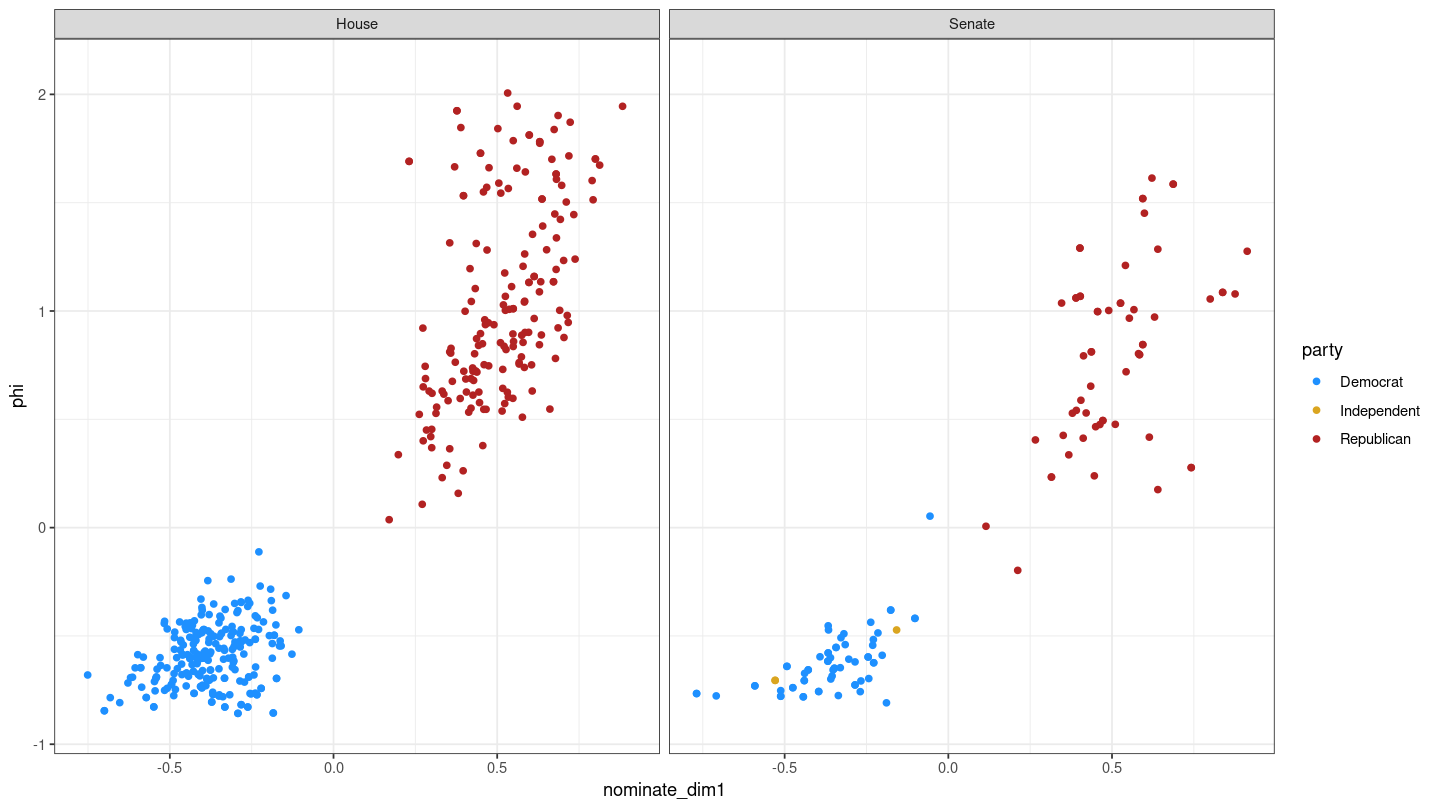

In [29]:
ggplot(elites %>% filter(!is.na(chamber)), aes(y=phi, x=nominate_dim1, color=party)) + geom_point() + theme_bw() + scale_color_manual(values=c("dodgerblue", "goldenrod", "firebrick")) + facet_wrap(vars(chamber))

The second dimension doesn't seem to have anything to do with either NOMINATE dimension.

Warning message:
‚ÄúRemoved 1149 rows containing missing values (geom_point).‚Äù
Warning message:
‚ÄúRemoved 1149 rows containing missing values (geom_point).‚Äù


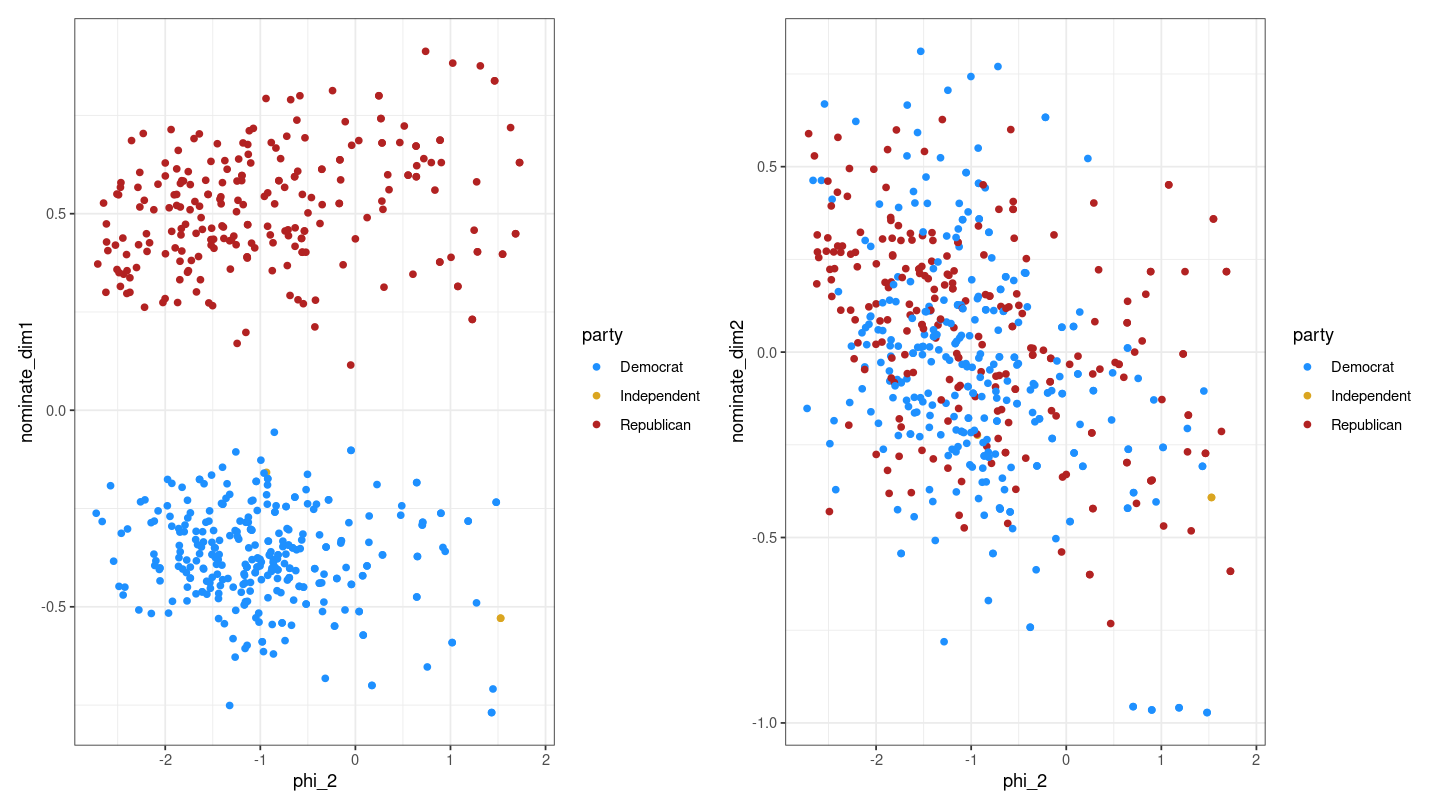

In [13]:
p1 <- ggplot(elites, aes(x=phi_2, y=nominate_dim1, color=party)) + geom_point() + theme_bw() + scale_color_manual(values=c("dodgerblue", "goldenrod", "firebrick"))
p2 <- ggplot(elites, aes(x=phi_2, y=nominate_dim2, color=party)) + geom_point() + theme_bw() + scale_color_manual(values=c("dodgerblue", "goldenrod", "firebrick"))
p1 + p2

The second dimension may have something to do with general popularity.

In [14]:
print(cor(elites$phi, elites$followers, use = "pairwise.complete.obs"))
print(cor(elites$phi_2, elites$followers, use = "pairwise.complete.obs"))

[1] -0.07151423
[1] 0.2769538


Warning message:
‚ÄúRemoved 57 rows containing missing values (geom_point).‚Äù


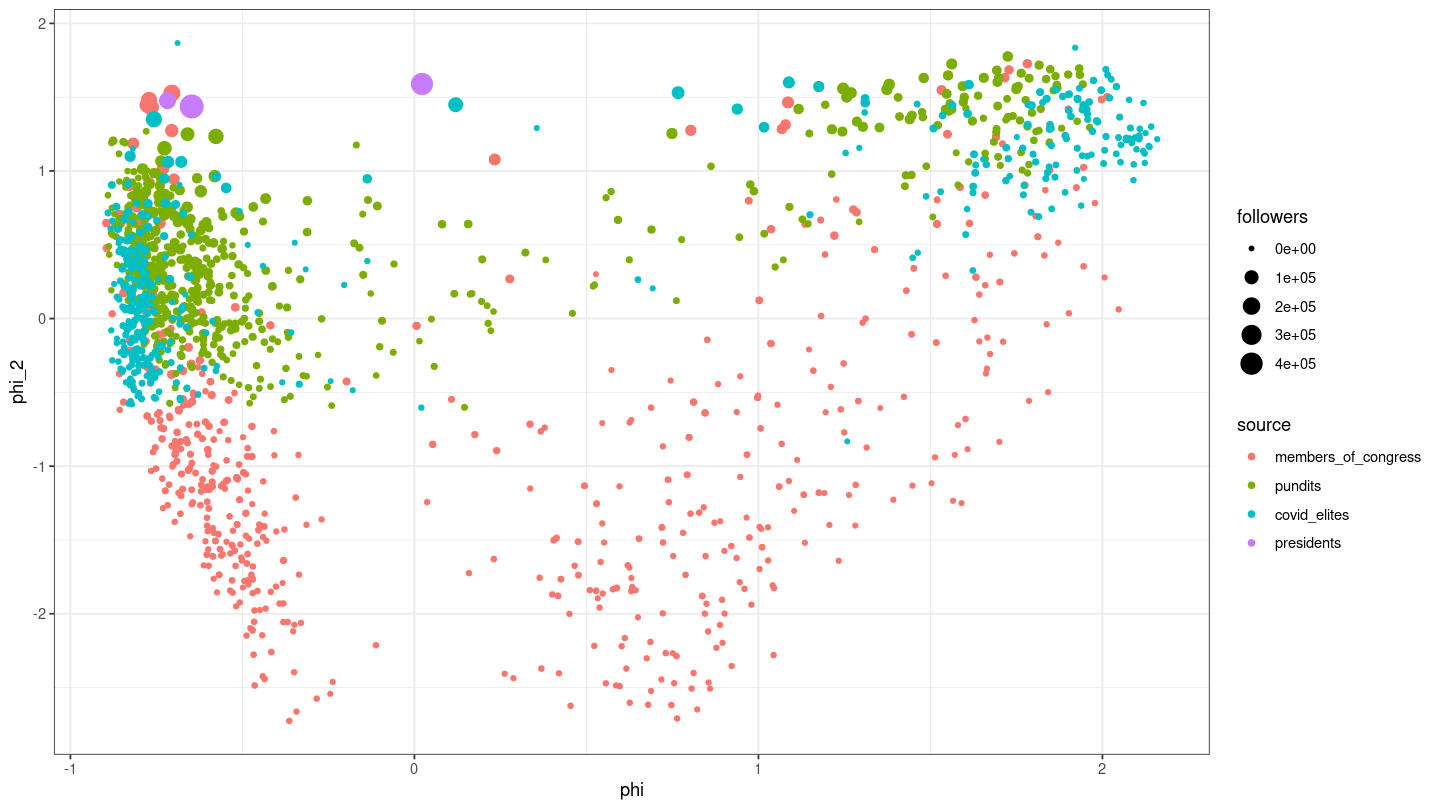

In [15]:
ggplot(elites, aes(x=phi, y=phi_2, color=source, size=followers)) + geom_point() + theme_bw()

The top/bottom 15 {MOCs,pundits,COVID elites}, by both first and second dimension.

In [16]:
elites %>% group_by(source) %>% slice_max(order_by = desc(phi), n = 15) %>% select(source, screen_name, phi, phi_2, followers)

source              screen_name                           phi        
1  members_of_congress repcori                               -0.89526864
2  members_of_congress coribush                              -0.89526864
3  members_of_congress jamaalbowmanny                        -0.89447477
4  members_of_congress repbowman                             -0.89447477
5  members_of_congress repmondaire                           -0.87869974
6  members_of_congress mondairejones                         -0.87869974
7  members_of_congress kaikahele                             -0.85758480
8  members_of_congress reppressley                           -0.85745093
9  members_of_congress ayannapressley                        -0.85745093
10 members_of_congress repteresalf                           -0.85683674
11 members_of_congress teresafornm                           -0.85683674
12 members_of_congress repkatieporter                        -0.85563554
13 members_of_congress katieporteroc                         -0.85563554
14 members_of_congress repjayapal                            -0.84530730
15 members_of_congress pramilajayapal                        -0.84530730
16 pundits             jamie_elizabeth                       -0.89075887
17 pundits             MalaikaJabali                         -0.88849395
18 pundits             JabariBrisport                        -0.88710972
19 pundits             jackcalifano                          -0.88098834
20 pundits             KeeangaYamahtta                       -0.88047967
21 pundits             Hbomberguy                            -0.88038697
22 pundits             daviddoel                             -0.87966169
23 pundits             proustmalone                          -0.87764333
24 pundits             jaboukie                              -0.87578740
25 pundits             MattLech                              -0.87203076
26 pundits             leslieleeiii                          -0.87126726
27 pundits             PrettyBadLefty                        -0.87114705
28 pundits             AyoCaesar                             -0.86901661
29 pundits             meaganmday                            -0.86656810
30 pundits             DrDooleyMD                            -0.86478644
31 covid_elites        Shahid Buttar for Congress            -0.89060060
32 covid_elites        MQ                                    -0.88340071
33 covid_elites        Grande Capo                           -0.88121565
34 covid_elites        N. K. Jemisin                         -0.87971908
35 covid_elites        Sol                                   -0.87837866
36 covid_elites        Imani Barbarin, MAGC | Crutches&Spice -0.87777055
37 covid_elites        Skyler Johnson                        -0.87294334
38 covid_elites        Akilah Hughes                         -0.86634315
39 covid_elites        Mary Leath                            -0.86512575
40 covid_elites        john boyega's y-wing squadron         -0.86478524
41 covid_elites        BlackWomenViews Media                 -0.86417648
42 covid_elites        Charles Booker                        -0.86160334
43 covid_elites        Ted                                   -0.86064936
44 covid_elites        keyvan (⁄©€åŸàÿßŸÜ)                        -0.85990935
45 covid_elites        chris evans                           -0.85871070
46 presidents          President Biden                       -0.71777763
47 presidents          Joe Biden                             -0.71777763
48 presidents          President Obama                       -0.64756882
49 presidents          Barack Obama                          -0.64756882
50 presidents          President Trump 45 Archived            0.02195789
51 presidents          Donald J. Trump                        0.02195789
   phi_2       followers
1   0.64746289   8543   
2   0.64746289   8543   
3   0.47711167   6021   
4   0.47711167   6021   
5   0.03214768   2027   
6   0.03214768   2027   
7  -0.37333870   2884   
8 

In [17]:
elites %>% group_by(source) %>% slice_max(order_by = phi, n = 15) %>% select(source, screen_name, phi, phi_2, followers)

source              screen_name                            phi        
1  members_of_congress ronnyjacksontx                          2.10668530
2  members_of_congress repronnyjackson                         2.10668530
3  members_of_congress augustpfluger                           2.04705812
4  members_of_congress reppfluger                              2.04705812
5  members_of_congress burgessowens                            2.01395205
6  members_of_congress repburgessowens                         2.01395205
7  members_of_congress repgregmurphy                           2.00620487
8  members_of_congress laurenboebert                           1.99748947
9  members_of_congress repboebert                              1.99748947
10 members_of_congress kat_cammack                             1.97794847
11 members_of_congress repkatcammack                           1.97794847
12 members_of_congress repmikejohnson                          1.94514833
13 members_of_congress repandybiggsaz                          1.94490910
14 members_of_congress repmikegarcia                           1.92435555
15 members_of_congress electmikegarcia                         1.92435555
16 pundits             EmeraldRobinson                         1.96289622
17 pundits             ChanelRion                              1.94302289
18 pundits             SidneyPowell1                           1.93426980
19 pundits             DavidJHarrisJr                          1.93253535
20 pundits             ACTBrigitte                             1.92655358
21 pundits             BrandonStraka                           1.90050246
22 pundits             robbystarbuck                           1.88140296
23 pundits             stclairashley                           1.86978844
24 pundits             ScottPresler                            1.86716583
25 pundits             jsolomonReports                         1.86339822
26 pundits             TheRightMelissa                         1.85776705
27 pundits             hodgetwins                              1.84822019
28 pundits             willchamberlain                         1.84634754
29 pundits             johncardillo                            1.84523875
30 pundits             GreggJarrett                            1.83626640
31 covid_elites        Deplorable Larry G                      2.15915213
32 covid_elites        üåªü©∫Destiny, RN, BSNü©∫üåª                    2.14168086
33 covid_elites        Matthew Holliday                        2.13701534
34 covid_elites        Jody Belcher                            2.13441395
35 covid_elites        Secret Stranger UK                      2.12534589
36 covid_elites        vicki cecilX                            2.12304039
37 covid_elites        COL (R) Stephen Mitchell                2.12261357
38 covid_elites        stormypatriotjoe                        2.11935889
39 covid_elites        robg                                    2.11826543
40 covid_elites        ùíúùìÉùëîùëíùìÅ‚öîÔ∏èùí≤ùí∂ùìáùìáùíæùëúùìáùü¶ùíØùìáùìäùìÇùìÖ                     2.10869293
41 covid_elites        ‚ùåüá∫üá∏Steveüá∫üá∏üá∫üá∏America Firstüá∫üá∏üáÆüáπMAGAüá∫üá∏KAG  2.10691286
42 covid_elites        He is Limitless ‚úùÔ∏è                       2.10667333
43 covid_elites        Mark Grant                              2.09875048
44 covid_elites        Evan Kilgore                            2.09494506
45 covid_elites        Shem Horne                              2.09105693
46 presidents          President Trump 45 Archived             0.02195789
47 presidents          Donald J. Trump                         0.02195789
48 presidents          President Obama                        -0.64756882
49 presidents          Barack Obama                           -0.64756882
50 presidents          President Biden                        -0.71777763
51 presidents          Joe Biden                              -0.71777763
   phi_2      followers
1  1.22391832   1

In [18]:
elites %>% group_by(source) %>% slice_max(order_by = desc(phi_2), n = 15) %>% select(source, screen_name, phi, phi_2, followers)

source              screen_name                  phi         phi_2     
1  members_of_congress repmcnerney                  -0.36383815 -2.7258202
2  members_of_congress robert_aderholt               0.76355138 -2.7094783
3  members_of_congress sanfordbishop                -0.34291617 -2.6630023
4  members_of_congress congpalazzo                   0.82209590 -2.6485449
5  members_of_congress repmckinley                   0.45382278 -2.6239676
6  members_of_congress repbobgibbs                   0.74683387 -2.6187082
7  members_of_congress repbilljohnson                0.67941149 -2.6168655
8  members_of_congress replarrybucshon               0.62593235 -2.6033290
9  members_of_congress repjimcosta                  -0.28414532 -2.5751058
10 members_of_congress repgonzalez                  -0.24470527 -2.5426301
11 members_of_congress repguthrie                    0.68791432 -2.5233749
12 members_of_congress repwesterman                  0.85931086 -2.5078266
13 members_of_congress repmikerogersal               0.80547274 -2.5071450
14 members_of_congress repmgriffith                  0.59679865 -2.4910400
15 members_of_congress gracenapolitano              -0.46457347 -2.4860657
16 pundits             DavidMDrucker                 0.14559252 -0.6013899
17 pundits             POLITICO_Steve               -0.24064365 -0.5899539
18 pundits             nedprice                     -0.71133200 -0.5741439
19 pundits             anitakumar01                 -0.47906981 -0.5732924
20 pundits             jonallendc                   -0.37802132 -0.5495217
21 pundits             agearan                      -0.46835083 -0.5297663
22 pundits             apalmerdc                    -0.36093279 -0.5267997
23 pundits             DavidPriess                  -0.66213370 -0.4749491
24 pundits             margarettalev                -0.45097713 -0.4732129
25 pundits             AJentleson                   -0.69560916 -0.4681610
26 pundits             rachaelmbade                 -0.48233474 -0.4679862
27 pundits             StuPolitics                  -0.25288250 -0.4639132
28 pundits             JMilesColeman                -0.41835455 -0.4607347
29 pundits             billscher                    -0.50958914 -0.4485428
30 pundits             gdebenedetti                 -0.53270446 -0.4193342
31 covid_elites        MDR                           1.25800281 -0.8321468
32 covid_elites        Mike Ricci                    0.02015583 -0.6035519
33 covid_elites        Maya Chavez                  -0.82066625 -0.5807592
34 covid_elites        Aaron Black                  -0.83071974 -0.5759125
35 covid_elites        Alex                         -0.82523864 -0.5596734
36 covid_elites        Ian Sams                     -0.68048153 -0.5504051
37 covid_elites        Nate Lerner                  -0.79324211 -0.5434681
38 covid_elites        Chris Lu                     -0.75292670 -0.5401373
39 covid_elites        Jesse Lehrich                -0.68147928 -0.5400430
40 covid_elites        Mark Elliot                  -0.75680414 -0.5332601
41 covid_elites        Monty Lincoln's Speeches Boa -0.80436426 -0.5255503
42 covid_elites        Joe Cunningham               -0.62886626 -0.5142405
43 covid_elites        Peter Morley                 -0.80125818 -0.5075370
44 covid_elites        Sawyer Hackett               -0.74249920 -0.4957071
45 covid_elites        RICHARD W.                   -0.17923151 -0.4857172
46 presidents          President Obama              -0.64756882  1.4370179
47 presidents          Barack Obama                 -0.64756882  1.4370179
48 presidents          President Biden              -0.71777763  1.4764719
49 presidents          Joe Biden                    -0.71777763  1.4764719
50 presidents          President Trump 45 Archived   0.02195789  1.5895384
51 presidents          Donald J. Trump               0.02195789  1.5895384
   followers
1     701   
2     554   
3     547   
4     308   
5     660   
6     770   
7     766   

In [19]:
elites %>% group_by(source) %>% slice_max(order_by = phi_2, n = 15) %>% select(source, screen_name, phi, phi_2, followers)

source              screen_name                 phi         phi_2   
1  members_of_congress repmattgaetz                 1.78161335 1.726704
2  members_of_congress mattgaetz                    1.78161335 1.726704
3  members_of_congress repdevinnunes                1.72835895 1.685016
4  members_of_congress devinnunes                   1.72835895 1.685016
5  members_of_congress jim_jordan                   1.71599670 1.632372
6  members_of_congress repdancrenshaw               1.53226767 1.548198
7  members_of_congress dancrenshawtx                1.53226767 1.548198
8  members_of_congress sensanders                  -0.70510360 1.527612
9  members_of_congress berniesanders               -0.70510360 1.527612
10 members_of_congress burgessowens                 2.01395205 1.502837
11 members_of_congress repburgessowens              2.01395205 1.502837
12 members_of_congress laurenboebert                1.99748947 1.484242
13 members_of_congress repboebert                   1.99748947 1.484242
14 members_of_congress repaoc                      -0.77142002 1.481292
15 members_of_congress aoc                         -0.77142002 1.481292
16 pundits             dbongino                     1.72491995 1.776184
17 pundits             RealCandaceO                 1.56192793 1.724944
18 pundits             w_terrence                   1.81602056 1.717128
19 pundits             DavidJHarrisJr               1.93253535 1.695116
20 pundits             hodgetwins                   1.84822019 1.689546
21 pundits             JesseBWatters                1.69285406 1.682040
22 pundits             SaraCarterDC                 1.76384331 1.662429
23 pundits             BrandonStraka                1.90050246 1.653068
24 pundits             SidneyPowell1                1.93426980 1.651665
25 pundits             JudgeJeanine                 1.55117812 1.647680
26 pundits             jsolomonReports              1.86339822 1.642937
27 pundits             DineshDSouza                 1.65514221 1.631255
28 pundits             TomiLahren                   1.48050899 1.630608
29 pundits             DiamondandSilk               1.69851899 1.630012
30 pundits             TomFitton                    1.78689634 1.628363
31 covid_elites        between 4 and 7 dogs        -0.68849977 1.867035
32 covid_elites        Eyes On Q                    1.92076822 1.835193
33 covid_elites        Vincent Kennedy              2.01008635 1.688377
34 covid_elites        Julian's Rum                 2.01501544 1.650376
35 covid_elites        M3thods                      2.02543052 1.621544
36 covid_elites        samanthamarika               1.97393835 1.613069
37 covid_elites        Donald Trump Jr.             1.08843024 1.600038
38 covid_elites        Kayleigh McEnany             1.61202814 1.585023
39 covid_elites        Eric Trump                   1.17530161 1.572317
40 covid_elites        Mark Taylor                  2.04097207 1.571592
41 covid_elites        CJTRUTH 6%‚≠êÔ∏è‚≠êÔ∏è‚≠êÔ∏è                2.04024798 1.571350
42 covid_elites        Martin Geddes 6%             1.93307732 1.560583
43 covid_elites        Kevin Sorbo                  1.86475801 1.551082
44 covid_elites        Rogan O'Handley üá∫üá∏           1.99644224 1.547791
45 covid_elites        George Papadopoulos          1.81866776 1.534259
46 presidents          President Trump 45 Archived  0.02195789 1.589538
47 presidents          Donald J. Trump              0.02195789 1.589538
48 presidents          President Biden             -0.71777763 1.476472
49 presidents          Joe Biden                   -0.71777763 1.476472
50 presidents          President Obama             -0.64756882 1.437018
51 presidents          Barack Obama                -0.64756882 1.437018
   followers
1   15289   
2   15289   
3   14763   
4   14763   
5   20601   
6   22486   
7   22486   
8  171866   
9  171866   
10   4218   
11   4218   
12   3971   
13   3971   
14 146625   
15 146625   
16  32072   
17  39149   
18  

In [20]:
write_tsv(elites, "../data/elites_combined_with_phi.tsv")